In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the synthetic data

In [23]:
np.random.seed(42)

# Parameters for initial components
start_date = "2018-01-01"
periods = 365 * 3  # Daily data for three years
trend = 0.01  # Linear trend component
seasonal_amplitude = 5  # Amplitude of the seasonal component
seasonal_period = 30.44 # Monthly
noise_level = 5  # Level of random noise

# Create initial components
time = np.arange(periods)
date_range = pd.date_range(start=start_date, periods=periods)
trend_component = trend * time
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * time / seasonal_period)
noise_component = noise_level * np.random.randn(periods)
demand = 100 + trend_component + seasonal_component + noise_component

# Initial demand series
df = pd.DataFrame({'date': date_range, 'demand': demand})
df['month_day'] = df['date'].dt.strftime('%m-%d')

# Parameters for special events
base_drop_amount = -60
base_increase_amount = 30
adjustment_noise_level = 15
drop_dates = df['month_day'] == '12-25'
increase_dates = df['month_day'] == '03-31'

# Apply special events adjustments
drop_noise = np.random.normal(loc=0, scale=adjustment_noise_level, size=len(df))
increase_noise = np.random.normal(loc=0, scale=adjustment_noise_level, size=len(df))
df.loc[drop_dates, 'demand'] += base_drop_amount + drop_noise[drop_dates]
df.loc[increase_dates, 'demand'] += base_increase_amount + increase_noise[increase_dates]
df.drop(columns=['month_day'], inplace=True)

# Create demand forecast
df['demand_forecast'] = df['demand'] * np.random.uniform(0.8, 1.2, len(df))

# Create social media and tv spend
df['social_spend'] = df['demand_forecast'] * 10 * np.random.uniform(0.9, 1.1, len(df))
df['tv_spend'] = df['demand_forecast'] * 20 * np.random.uniform(0.95, 1.05, len(df))

# Create sales
df['sales'] = df['demand'] * 0.3 + df['social_spend'] * 0.01 + df['tv_spend'] * 0.005

In [24]:
df

,date,demand,demand_forecast,social_spend,tv_spend,sales
0,2018-01-01,102.483571,91.837542,978.338829,1844.199346,49.749456
1,2018-01-02,100.343426,84.086397,850.565641,1674.699131,46.982180
2,2018-01-03,105.264432,97.471430,887.888762,2036.181513,50.639125
3,2018-01-04,110.547217,92.711300,1014.603788,1886.417196,52.742289
4,2018-01-05,102.544172,89.291238,895.165239,1708.123392,48.255521
...,...,...,...,...,...,...
1090,2020-12-26,105.871999,87.609245,879.282426,1762.246768,49.365658
1091,2020-12-27,106.519144,108.637479,985.891352,2119.739097,52.413352
1092,2020-12-28,110.997164,107.319352,1088.053004,2178.760557,55.073482
1093,2020-12-29,108.423689,124.806482,1353.094681,2400.346580,58.059786


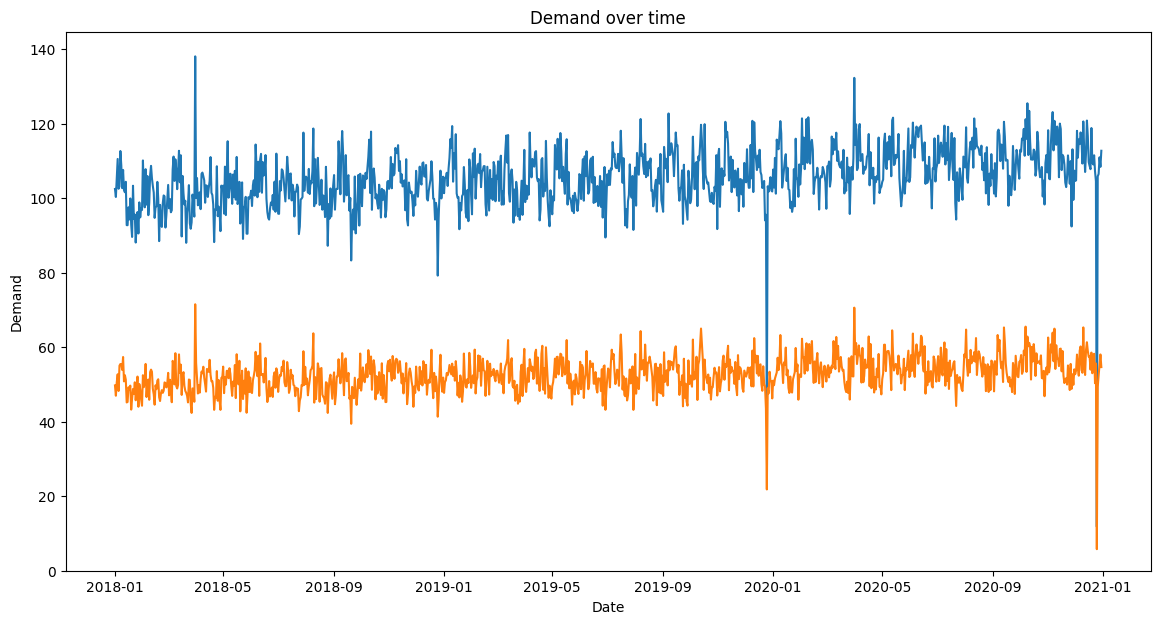

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['demand'], label='Demand')
plt.plot(df['date'], df['sales'], label='Sales')
plt.title('Demand over time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.ylim(bottom=0)
plt.show()

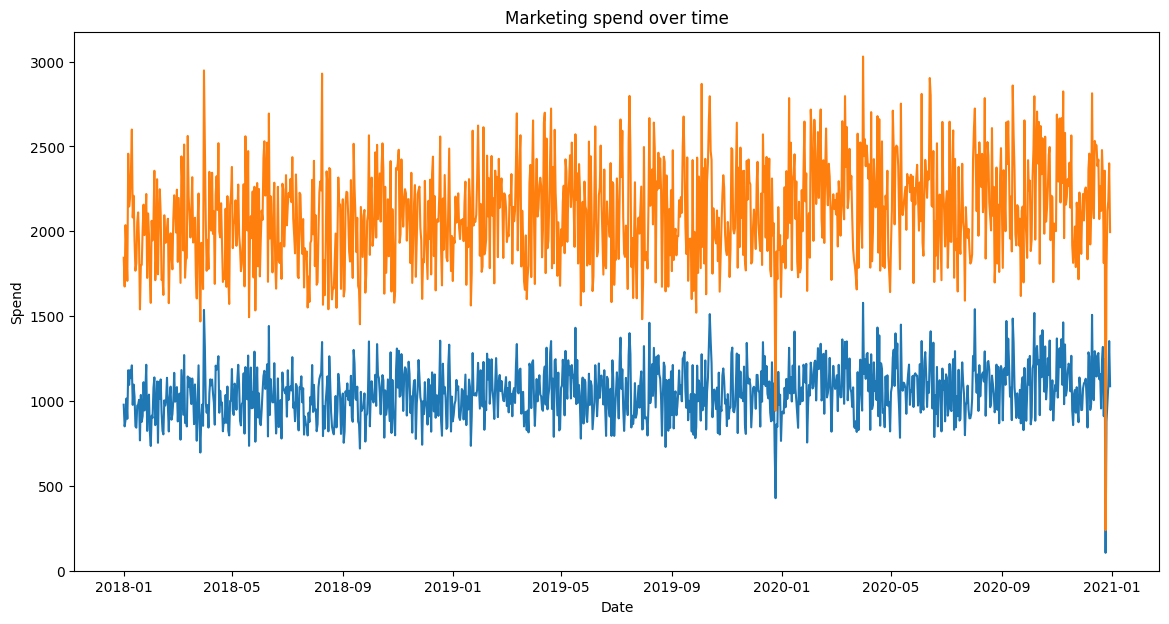

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['social_spend'], label='Social Spend')
plt.plot(df['date'], df['tv_spend'], label='TV Spend')
plt.title('Marketing spend over time')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.ylim(bottom=0)
plt.show()